### Nutri-score Project - Decision Modeling - Master BDMA 2025/2026

**Notebook 0: Data Analysis**

This notebook focuses on the initial steps of the decision modeling project, specifically understanding the food product dataset.

**Key Objectives:**
1. **Descriptive Statistics**: Analyzing key nutritional indicators (Energy, Fat, Sugars, Salt, Proteins, Fiber, Fruit/Veg%) to understand central tendencies and variability.
2. **Distribution Analysis**: Visualizing the distribution of nutritional values and scores to assess data quality and diversity.

This analysis serves as the foundation for subsequent modeling tasks (ELECTRE TRI, Machine Learning, etc.) implemented in separate notebooks.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import model_utils
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [9]:
# Load and validate database
df = model_utils.load_food_database('food_database.xlsx')
df.drop(df[df['fvl_percent'] < 0].index, inplace=True)
model_utils.validate_database(df)

Database loaded: 353 products

=== DATABASE VALIDATION ===
Total products: 353
✓ Database size requirement met

Nutri-Score Distribution:
  ✓ Class A: 71 (20.11%)
  ✓ Class B: 70 (19.83%)
  ✓ Class C: 84 (23.8%)
  ✓ Class D: 59 (16.71%)
  ✓ Class E: 69 (19.55%)

Green-Score Distribution:
  ✓ Class A: 92 (26.06%)
  ✓ Class B: 102 (28.9%)
  ✓ Class C: 56 (15.86%)
  ✓ Class D: 49 (13.88%)
  ✓ Class E: 54 (15.3%)


In [10]:

# ==============================================================================
# 1. LOAD AND PREPARE DATA
# ==============================================================================

# Display basic information
print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nDataset shape: {df.shape}")
print(f"Number of products: {len(df)}")
print("\nFirst few rows:")
print(df.head())

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

DATASET OVERVIEW

Dataset shape: (353, 17)
Number of products: 353

First few rows:
                                        product_name  energy_100g  \
0  Pain de mie grandes tranches Seigle & Graines ...       1246.0   
1       14 Maxi Tranches complet sans sucres ajoutés       1026.0   
2  pain de mie grandes tranches spécial sandwich ...       1089.0   
3  Harrys brioche tressee nature au sucre perle s...       1496.0   
4                              100% mie complet 500g       1053.0   

   saturated_fat_100g  sugars_100g  salt_100g  proteins_100g  fiber_100g  \
0                 1.0          4.2       0.96           12.0         7.2   
1                 0.3          3.8       1.20            8.7         6.6   
2                 0.5          5.0       1.00            8.3         6.3   
3                 1.0         13.0       0.80            8.6         4.5   
4                 0.4          5.5       1.10            7.5         6.5   

   fvl_percent  nutri_score_value nutri_scor

In [11]:
# ==============================================================================
# 2. DESCRIPTIVE STATISTICS
# ==============================================================================

print("\n" + "="*80)
print("DESCRIPTIVE STATISTICS")
print("="*80)

# Define criteria columns
criteria_cols = ['energy_100g', 'saturated_fat_100g', 'sugars_100g', 
                 'salt_100g', 'proteins_100g', 'fiber_100g', 'fvl_percent']

# Basic statistics
stats_summary = df[criteria_cols].describe()
print("\nBasic Statistics:")
print(stats_summary)

# Additional statistics
additional_stats = pd.DataFrame({
    'Mean': df[criteria_cols].mean(),
    'Median': df[criteria_cols].median(),
    'Std': df[criteria_cols].std(),
    'CV (%)': (df[criteria_cols].std() / df[criteria_cols].mean() * 100),
    'Q1': df[criteria_cols].quantile(0.25),
    'Q3': df[criteria_cols].quantile(0.75),
    'IQR': df[criteria_cols].quantile(0.75) - df[criteria_cols].quantile(0.25),
    'Skewness': df[criteria_cols].skew(),
    'Kurtosis': df[criteria_cols].kurtosis()
})

print("\nDetailed Statistics Table:")
print(additional_stats.round(2))


DESCRIPTIVE STATISTICS

Basic Statistics:
       energy_100g  saturated_fat_100g  sugars_100g   salt_100g  \
count   353.000000          353.000000   353.000000  353.000000   
mean   1088.728895            2.713406    13.708858    0.881578   
std     670.742830            5.678151    21.173690    1.633011   
min      86.000000            0.000000     0.000000    0.000000   
25%     463.000000            0.235000     1.200000    0.030000   
50%    1024.000000            0.800000     3.400000    0.650000   
75%    1525.000000            2.400000    15.100000    1.080000   
max    3033.000000           34.000000    98.500000   17.200000   

       proteins_100g  fiber_100g  fvl_percent  
count     353.000000  353.000000   353.000000  
mean        7.402739    2.444008    16.783188  
std         6.210861    3.096265    28.601472  
min         0.000000    0.000000     0.000000  
25%         1.900000    0.000000     0.000000  
50%         6.900000    1.200000     0.150000  
75%        10.500


DISTRIBUTION ANALYSIS


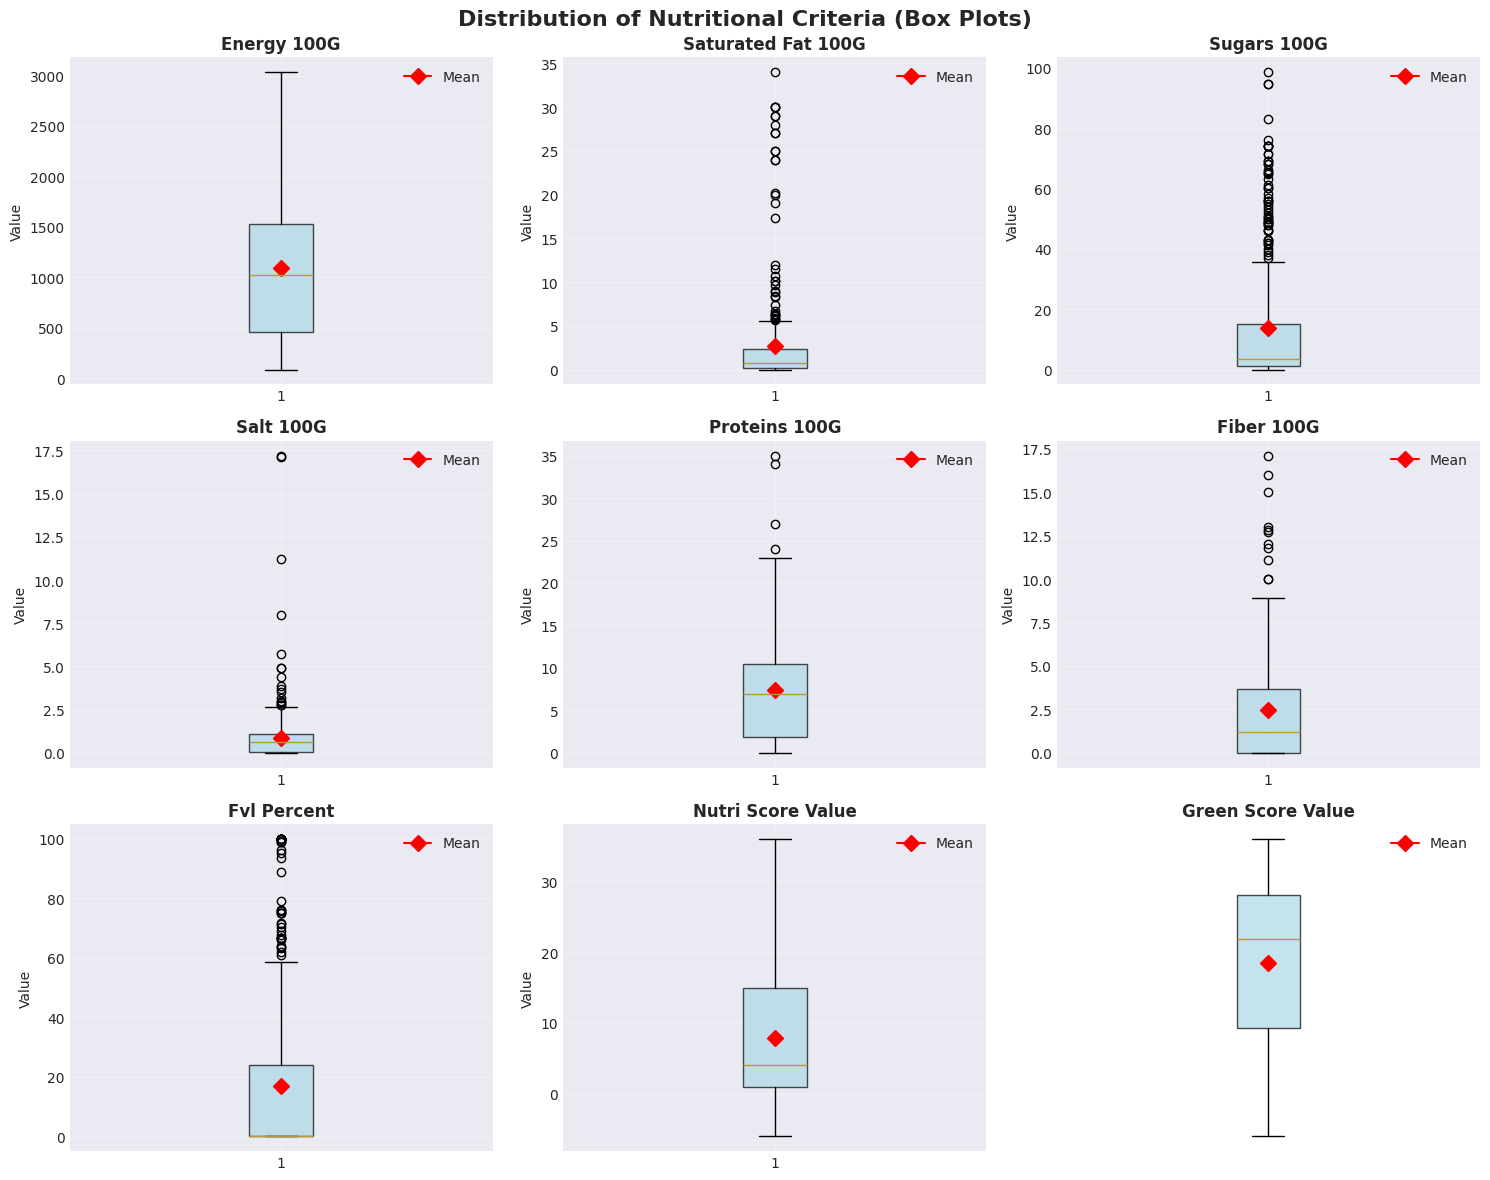

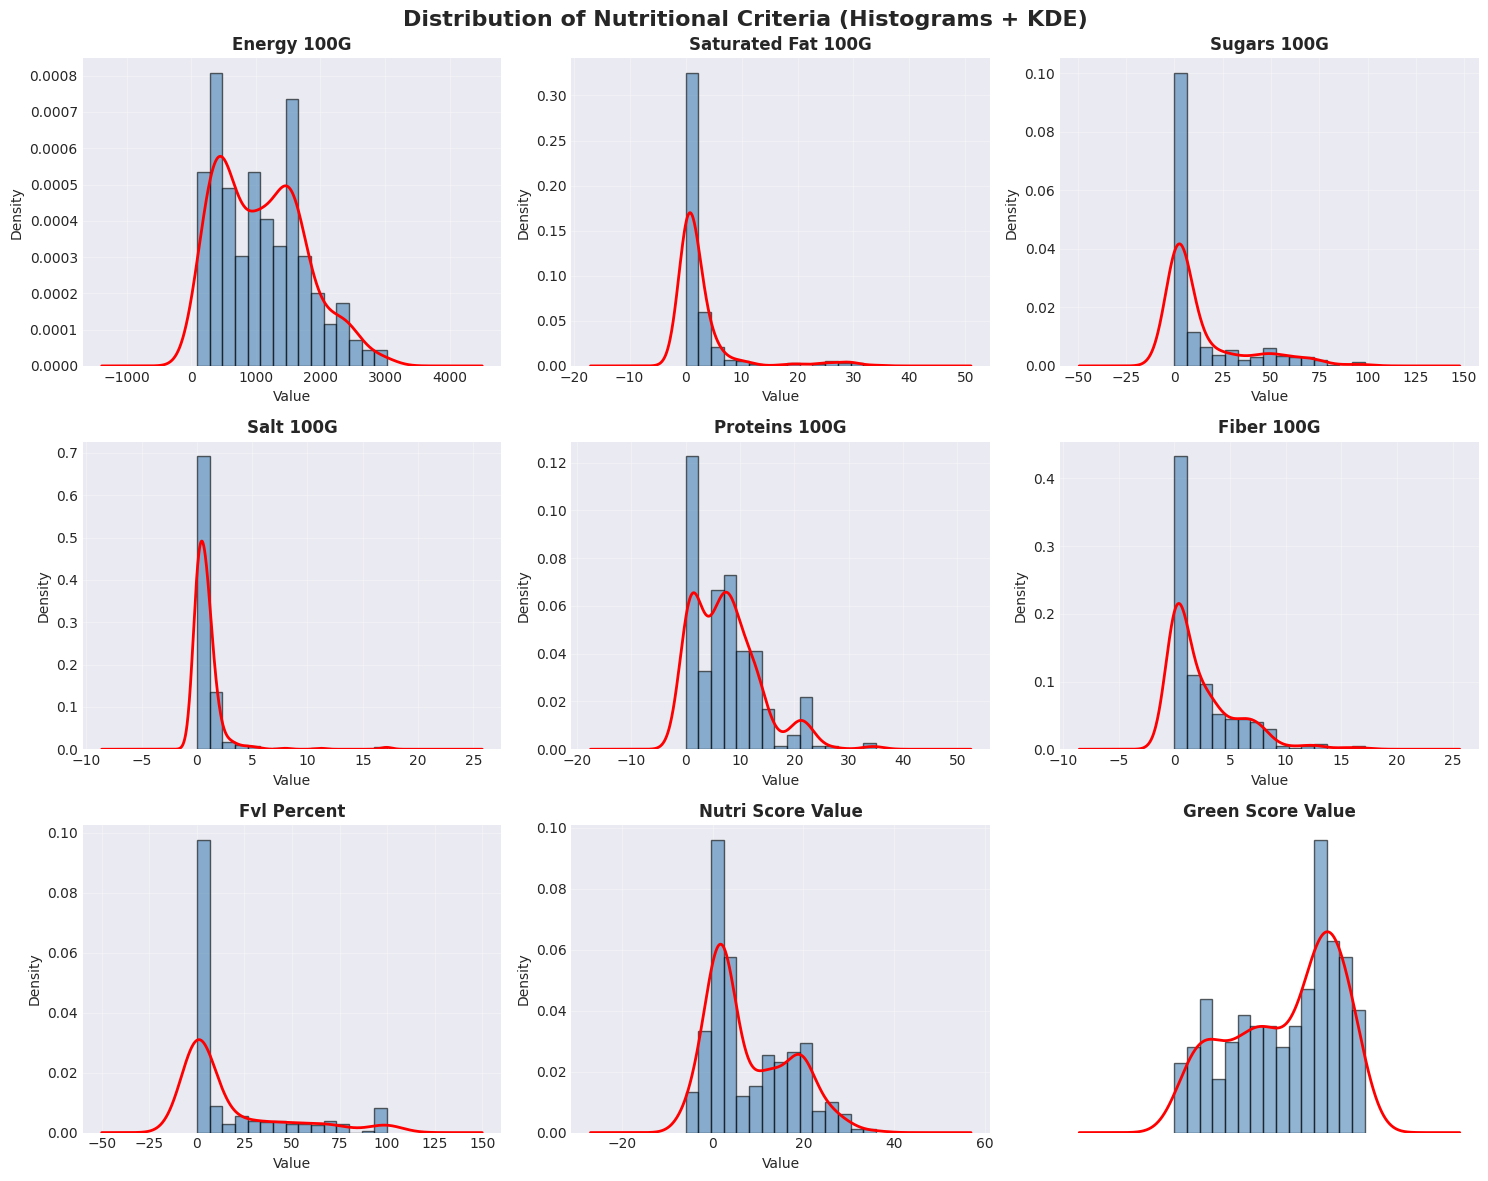

In [12]:
# ==============================================================================
# 3. DISTRIBUTION ANALYSIS
# ==============================================================================

print("\n" + "="*80)
print("DISTRIBUTION ANALYSIS")
print("="*80)

# Create box plots for all criteria
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribution of Nutritional Criteria (Box Plots)', fontsize=16, fontweight='bold')

for idx, col in enumerate(criteria_cols + ['nutri_score_value', 'green_score_value']):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    # Box plot
    bp = ax.boxplot(df[col].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    
    # Add mean marker
    mean_val = df[col].mean()
    ax.plot(1, mean_val, marker='D', color='red', markersize=8, label='Mean')
    
    ax.set_title(col.replace('_', ' ').title(), fontweight='bold')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3)
    ax.legend()

# Remove empty subplot
axes[2, 2].axis('off')

plt.tight_layout()
plt.show()

# Histograms with KDE
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribution of Nutritional Criteria (Histograms + KDE)', fontsize=16, fontweight='bold')

for idx, col in enumerate(criteria_cols + ['nutri_score_value', 'green_score_value']):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    # Histogram with KDE
    ax.hist(df[col].dropna(), bins=15, alpha=0.6, color='steelblue', edgecolor='black', density=True)
    df[col].dropna().plot(kind='kde', ax=ax, color='red', linewidth=2)
    
    ax.set_title(col.replace('_', ' ').title(), fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.grid(True, alpha=0.3)

axes[2, 2].axis('off')

plt.tight_layout()
plt.show()


CORRELATION ANALYSIS

Correlation Matrix:
                    energy_100g  saturated_fat_100g  sugars_100g  salt_100g  \
energy_100g               1.000               0.555        0.349     -0.135   
saturated_fat_100g        0.555               1.000        0.079     -0.063   
sugars_100g               0.349               0.079        1.000     -0.192   
salt_100g                -0.135              -0.063       -0.192      1.000   
proteins_100g             0.056               0.067       -0.345      0.148   
fiber_100g                0.322               0.143       -0.048     -0.110   
fvl_percent              -0.401              -0.185        0.088     -0.062   
nutri_score_value         0.577               0.493        0.578      0.281   
green_score_value        -0.106              -0.309       -0.033     -0.020   

                    proteins_100g  fiber_100g  fvl_percent  nutri_score_value  \
energy_100g                 0.056       0.322       -0.401              0.577   
satu

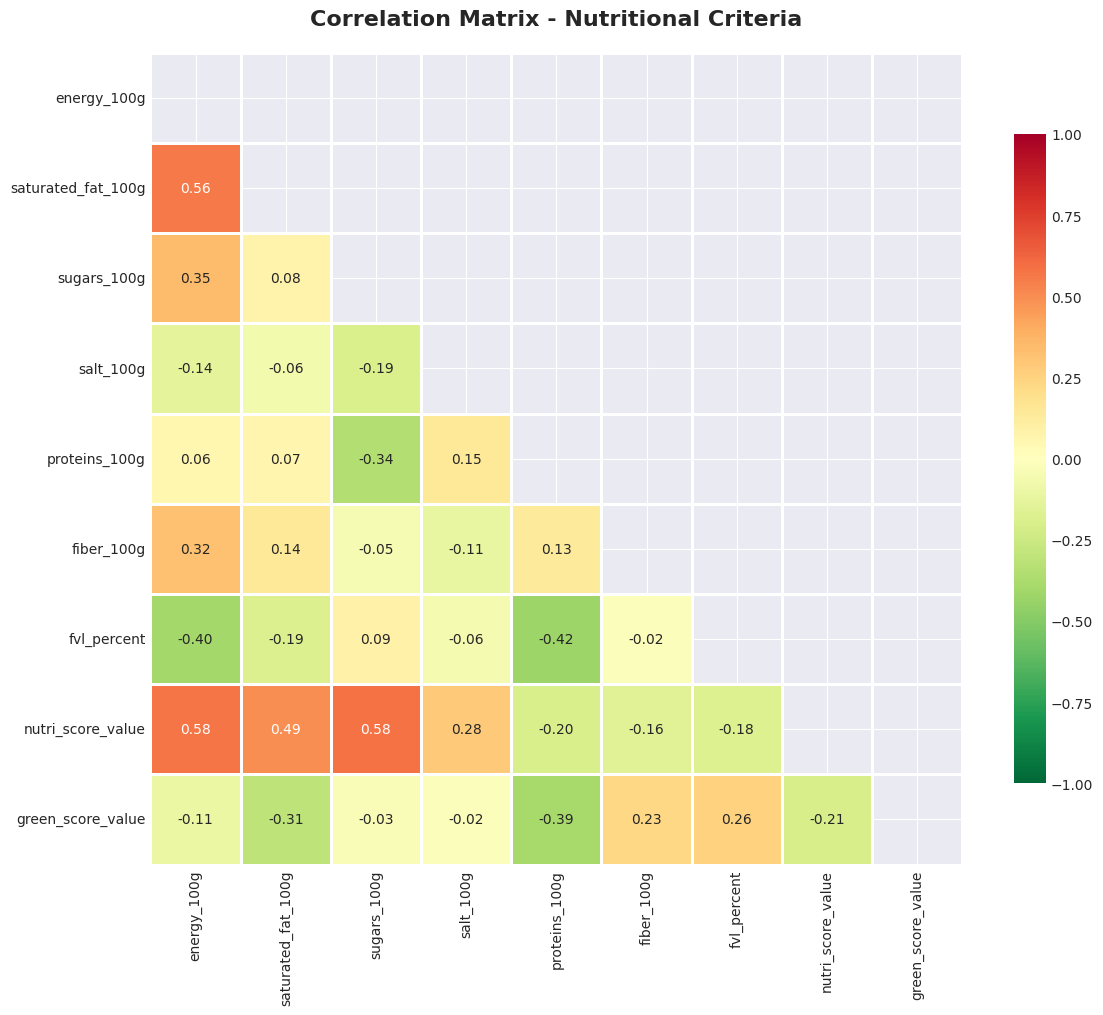


Strong Correlations (|r| > 0.5):
  energy_100g ↔ saturated_fat_100g: 0.555
  energy_100g ↔ nutri_score_value: 0.577
  sugars_100g ↔ nutri_score_value: 0.578


In [13]:
# ==============================================================================
# 4. CORRELATION ANALYSIS
# ==============================================================================

print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Calculate correlation matrix
correlation_cols = criteria_cols + ['nutri_score_value', 'green_score_value']
corr_matrix = df[correlation_cols].corr()

print("\nCorrelation Matrix:")
print(corr_matrix.round(3))

# Visualize correlation matrix - Heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlGn_r', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Correlation Matrix - Nutritional Criteria', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find strong correlations (|r| > 0.5)
print("\nStrong Correlations (|r| > 0.5):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            print(f"  {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")


LABEL DISTRIBUTION ANALYSIS

Nutri-Score Label Distribution:
  Grade A: 71 products (20.1%)
  Grade B: 70 products (19.8%)
  Grade C: 84 products (23.8%)
  Grade D: 59 products (16.7%)
  Grade E: 69 products (19.5%)

Green-Score Label Distribution:
  Grade A: 92 products (26.1%)
  Grade B: 102 products (28.9%)
  Grade C: 56 products (15.9%)
  Grade D: 49 products (13.9%)
  Grade E: 54 products (15.3%)


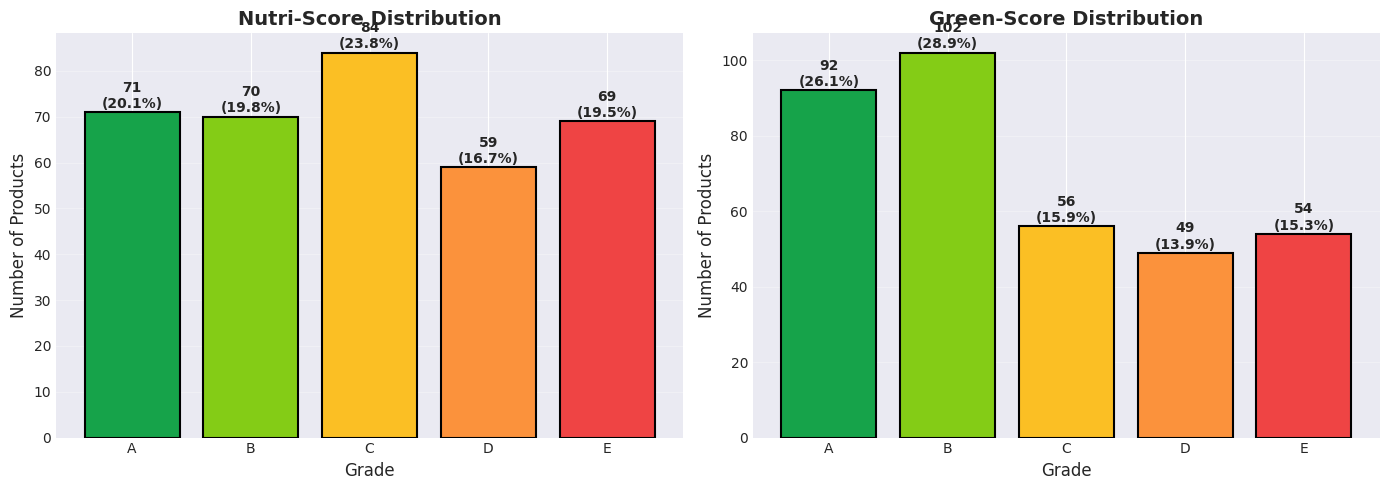

In [14]:
# ==============================================================================
# 5. LABEL DISTRIBUTION ANALYSIS
# ==============================================================================

print("\n" + "="*80)
print("LABEL DISTRIBUTION ANALYSIS")
print("="*80)

# Nutri-Score distribution
nutri_dist = df['nutri_score_label'].value_counts().sort_index()
nutri_pct = (nutri_dist / len(df) * 100).round(1)

print("\nNutri-Score Label Distribution:")
for label in ['A', 'B', 'C', 'D', 'E']:
    if label in nutri_dist.index:
        print(f"  Grade {label}: {nutri_dist[label]} products ({nutri_pct[label]}%)")

# Green-Score distribution
green_dist = df['green_score_label'].value_counts().sort_index()
green_pct = (green_dist / len(df) * 100).round(1)

print("\nGreen-Score Label Distribution:")
for label in ['A', 'B', 'C', 'D', 'E']:
    if label in green_dist.index:
        print(f"  Grade {label}: {green_dist[label]} products ({green_pct[label]}%)")

# Visualize label distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Nutri-Score
colors_nutri = {'A': '#16a34a', 'B': '#84cc16', 'C': '#fbbf24', 'D': '#fb923c', 'E': '#ef4444'}
colors_list_nutri = [colors_nutri.get(x, 'gray') for x in nutri_dist.index]

axes[0].bar(nutri_dist.index, nutri_dist.values, color=colors_list_nutri, edgecolor='black', linewidth=1.5)
axes[0].set_title('Nutri-Score Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Grade', fontsize=12)
axes[0].set_ylabel('Number of Products', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Add percentage labels
for i, (label, count) in enumerate(zip(nutri_dist.index, nutri_dist.values)):
    axes[0].text(i, count + 0.3, f'{count}\n({nutri_pct[label]}%)', 
                ha='center', va='bottom', fontweight='bold')

# Green-Score
colors_list_green = [colors_nutri.get(x, 'gray') for x in green_dist.index]

axes[1].bar(green_dist.index, green_dist.values, color=colors_list_green, edgecolor='black', linewidth=1.5)
axes[1].set_title('Green-Score Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Grade', fontsize=12)
axes[1].set_ylabel('Number of Products', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

for i, (label, count) in enumerate(zip(green_dist.index, green_dist.values)):
    axes[1].text(i, count + 0.3, f'{count}\n({green_pct[label]}%)', 
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


CROSS-TABULATION: NUTRI-SCORE vs GREEN-SCORE



Cross-tabulation:
green_score_label   A    B   C   D   E  Total
nutri_score_label                            
A                  27   28   3   4   9     71
B                  23   12  10   8  17     70
C                  27   24  16   9   8     84
D                  12   22   9   8   8     59
E                   3   16  18  20  12     69
Total              92  102  56  49  54    353


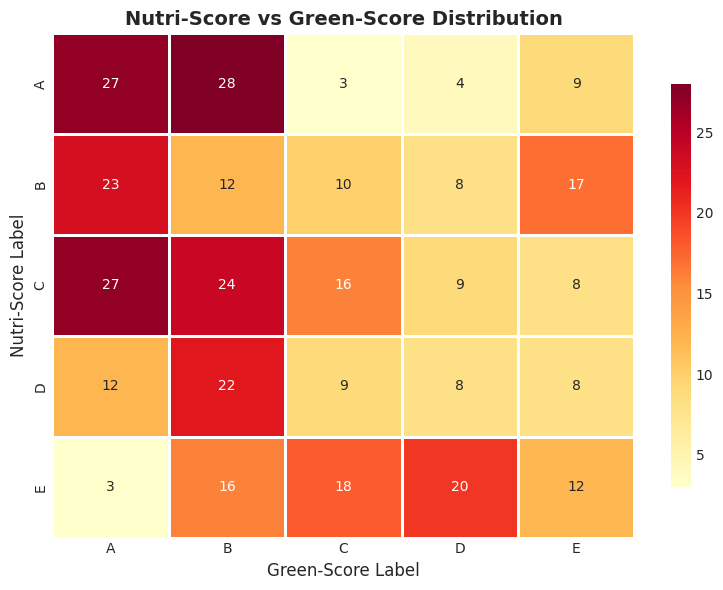

In [15]:
# ==============================================================================
# 6. CROSS-TABULATION: NUTRI-SCORE vs GREEN-SCORE
# ==============================================================================

print("\n" + "="*80)
print("CROSS-TABULATION: NUTRI-SCORE vs GREEN-SCORE")
print("="*80)

crosstab = pd.crosstab(df['nutri_score_label'], df['green_score_label'], 
                       margins=True, margins_name='Total')
print("\nCross-tabulation:")
print(crosstab)

# Visualize cross-tabulation
crosstab_no_margins = pd.crosstab(df['nutri_score_label'], df['green_score_label'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_no_margins, annot=True, fmt='d', cmap='YlOrRd', 
            linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Nutri-Score vs Green-Score Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Green-Score Label', fontsize=12)
plt.ylabel('Nutri-Score Label', fontsize=12)
plt.tight_layout()
plt.show()


SCATTER PLOTS: CRITERIA vs SCORES


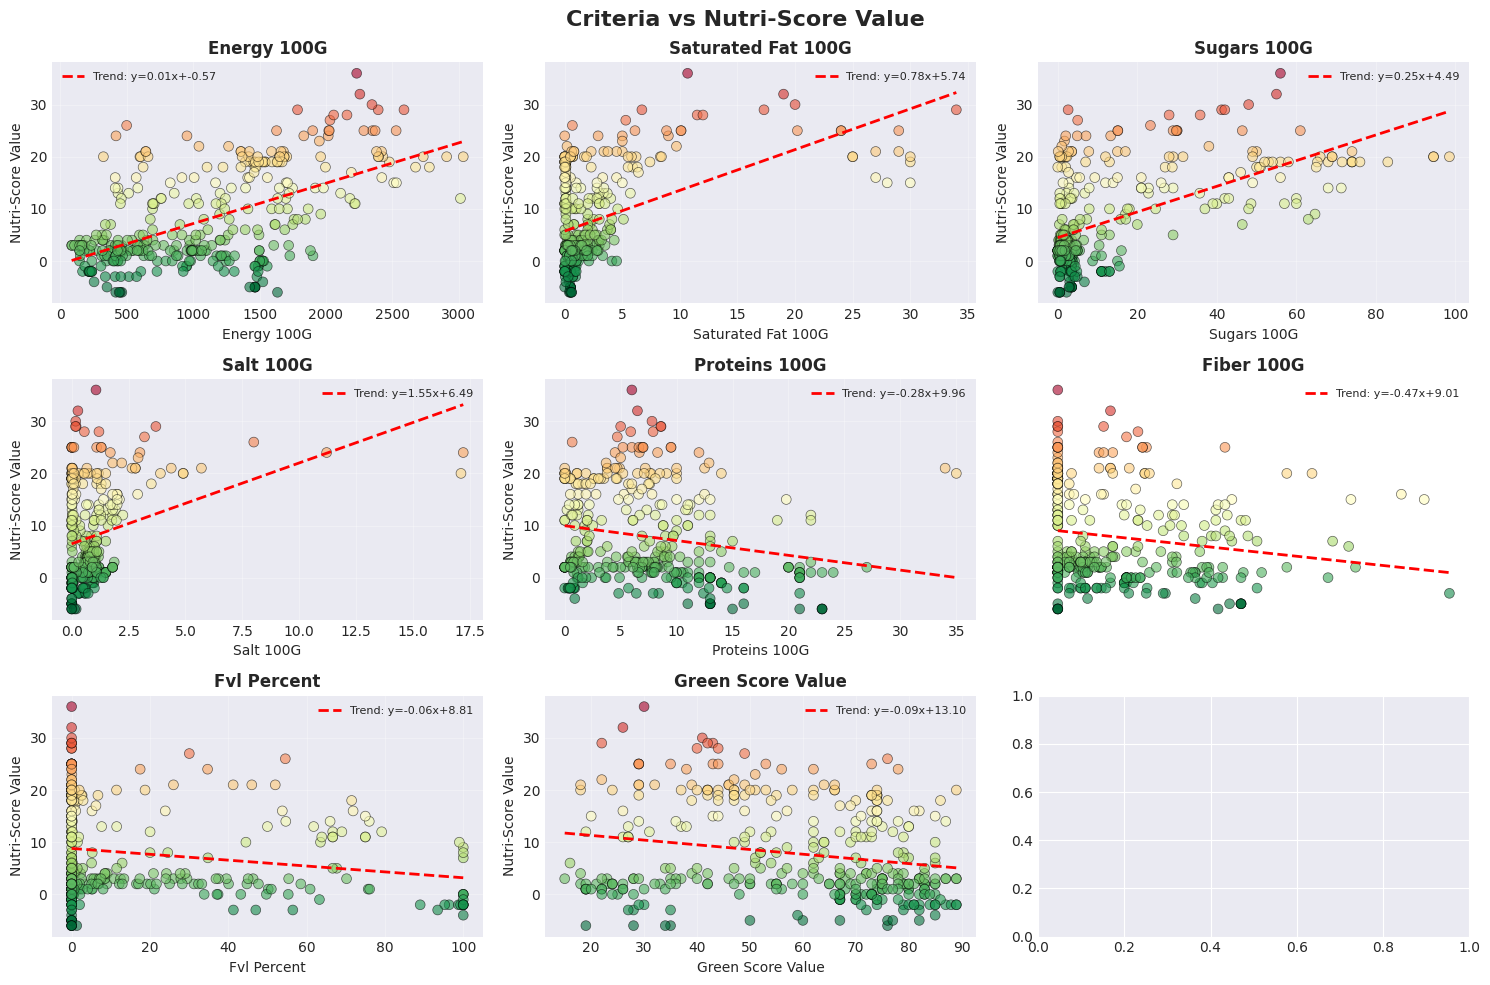

In [16]:
# ==============================================================================
# 7. SCATTER PLOTS: CRITERIA vs SCORES
# ==============================================================================

print("\n" + "="*80)
print("SCATTER PLOTS: CRITERIA vs SCORES")
print("="*80)

# Select key criteria for scatter plots
key_criteria = ['energy_100g', 'saturated_fat_100g', 'sugars_100g', 
                     'salt_100g', 'proteins_100g', 'fiber_100g', 'fvl_percent', 'green_score_value']

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle('Criteria vs Nutri-Score Value', fontsize=16, fontweight='bold')

for idx, criterion in enumerate(key_criteria):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    scatter = ax.scatter(df[criterion], df['nutri_score_value'], 
                        c=df['nutri_score_value'], cmap='RdYlGn_r', 
                        alpha=0.6, edgecolors='black', linewidth=0.5, s=50)
    
    # Add trend line
    z = np.polyfit(df[criterion].dropna(), df.loc[df[criterion].notna(), 'nutri_score_value'], 1)
    p = np.poly1d(z)
    ax.plot(df[criterion].sort_values(), p(df[criterion].sort_values()), 
            "r--", linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')
    
    ax.set_xlabel(criterion.replace('_', ' ').title(), fontsize=10)
    ax.set_ylabel('Nutri-Score Value', fontsize=10)
    ax.set_title(criterion.replace('_', ' ').title(), fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

In [17]:
# ==============================================================================
# 8. QUANTILE ANALYSIS FOR PROFILE DETERMINATION
# ==============================================================================

print("\n" + "="*80)
print("QUANTILE ANALYSIS FOR LIMITING PROFILES")
print("="*80)

quantiles = [0, 0.20, 0.40, 0.60, 0.80, 1.0]
quantile_df = df[criteria_cols + ['green_score_value']].quantile(quantiles)

print("\nQuantiles for Profile Determination:")
print(quantile_df.round(2))


QUANTILE ANALYSIS FOR LIMITING PROFILES

Quantiles for Profile Determination:
     energy_100g  saturated_fat_100g  sugars_100g  salt_100g  proteins_100g  \
0.0         86.0                0.00         0.00       0.00           0.00   
0.2        428.6                0.10         0.90       0.02           1.20   
0.4        791.6                0.50         2.58       0.47           5.38   
0.6       1252.0                1.12         4.20       0.74           8.00   
0.8       1643.2                3.00        25.44       1.19          12.00   
1.0       3033.0               34.00        98.50      17.20          35.00   

     fiber_100g  fvl_percent  green_score_value  
0.0        0.00         0.00               15.0  
0.2        0.00         0.00               36.0  
0.4        0.60         0.00               54.0  
0.6        2.00         2.50               70.0  
0.8        4.96        34.77               78.0  
1.0       17.10       100.00               89.0  



CRITERION DISTRIBUTIONS WITH QUANTILE LINES

📊 ENERGY_100G DISTRIBUTION
--------------------------------------------------
Q0 (min):    86.00
    Q20%:   428.60
    Q40%:   791.60
    Q60%:  1252.00
    Q80%:  1643.20
Q100 (max):  3033.00



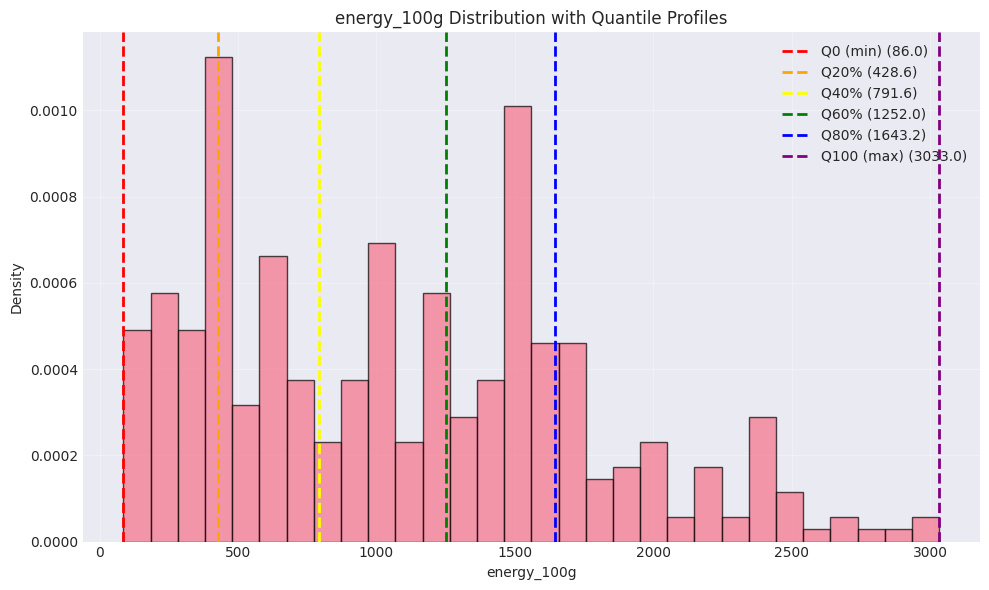



📊 SATURATED_FAT_100G DISTRIBUTION
--------------------------------------------------
Q0 (min):     0.00
    Q20%:     0.10
    Q40%:     0.50
    Q60%:     1.12
    Q80%:     3.00
Q100 (max):    34.00



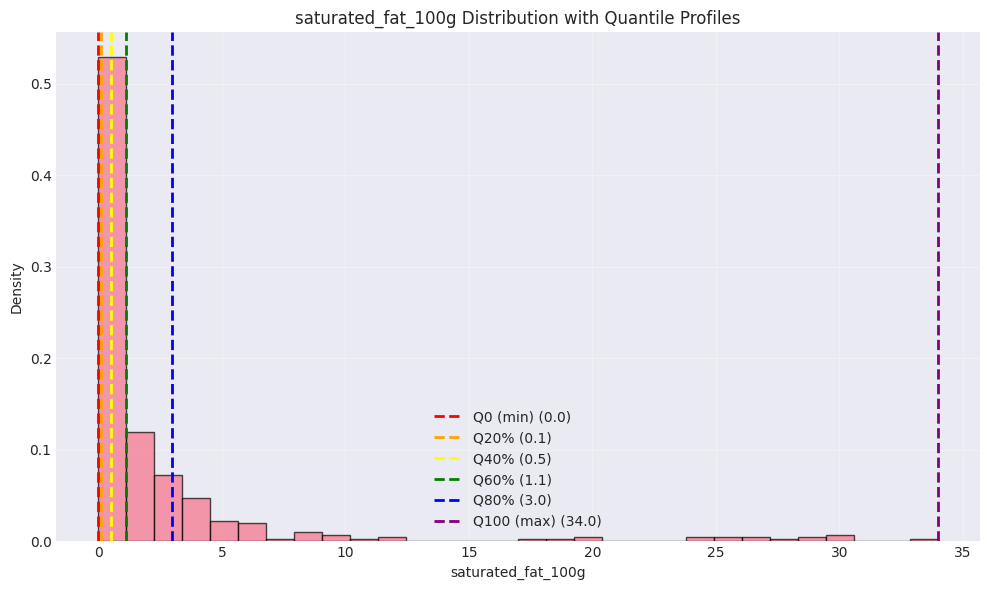



📊 SUGARS_100G DISTRIBUTION
--------------------------------------------------
Q0 (min):     0.00
    Q20%:     0.90
    Q40%:     2.58
    Q60%:     4.20
    Q80%:    25.44
Q100 (max):    98.50



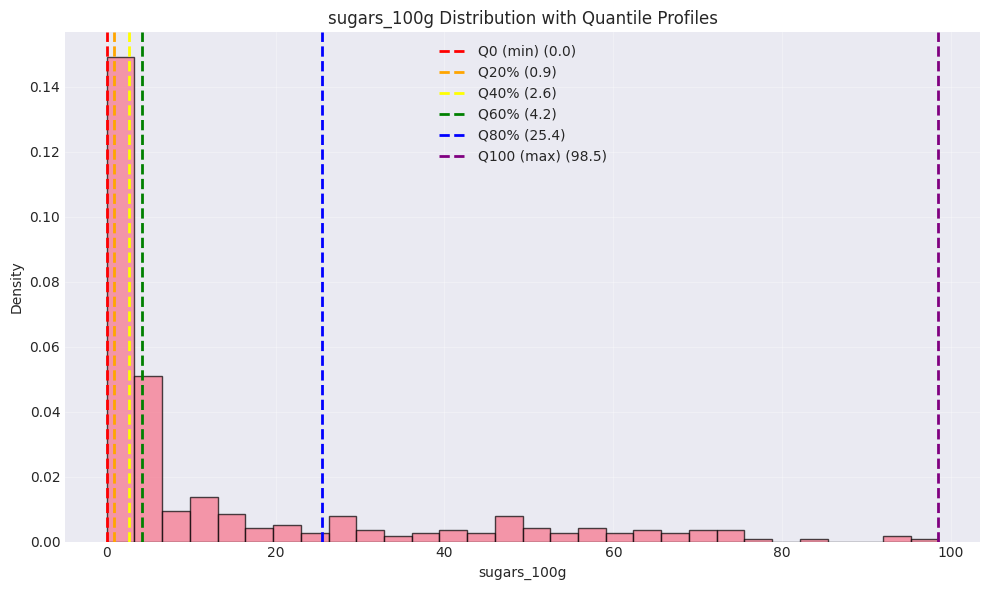



📊 SALT_100G DISTRIBUTION
--------------------------------------------------
Q0 (min):     0.00
    Q20%:     0.02
    Q40%:     0.47
    Q60%:     0.74
    Q80%:     1.19
Q100 (max):    17.20



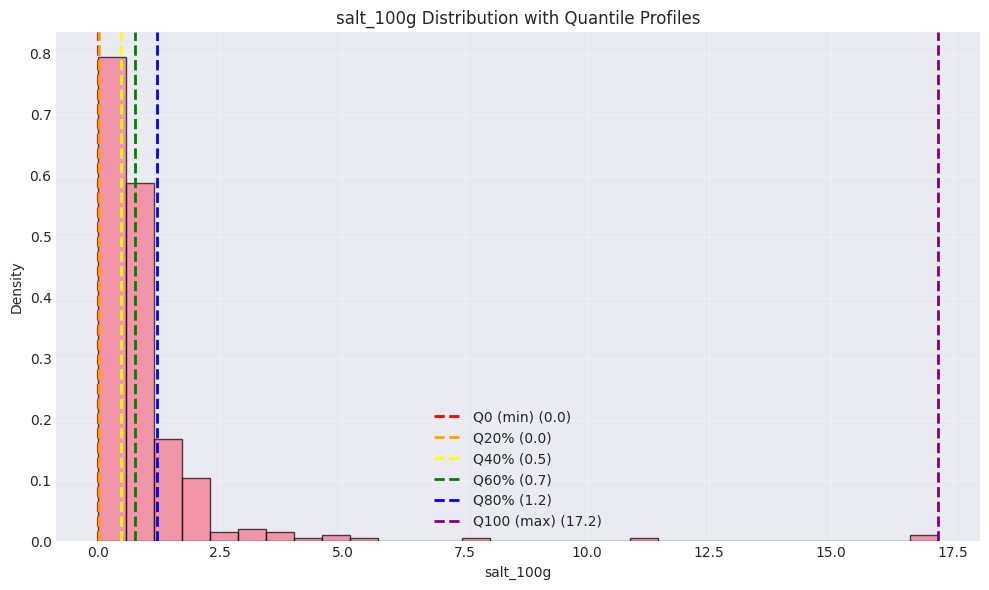



📊 PROTEINS_100G DISTRIBUTION
--------------------------------------------------
Q0 (min):     0.00
    Q20%:     1.20
    Q40%:     5.38
    Q60%:     8.00
    Q80%:    12.00
Q100 (max):    35.00



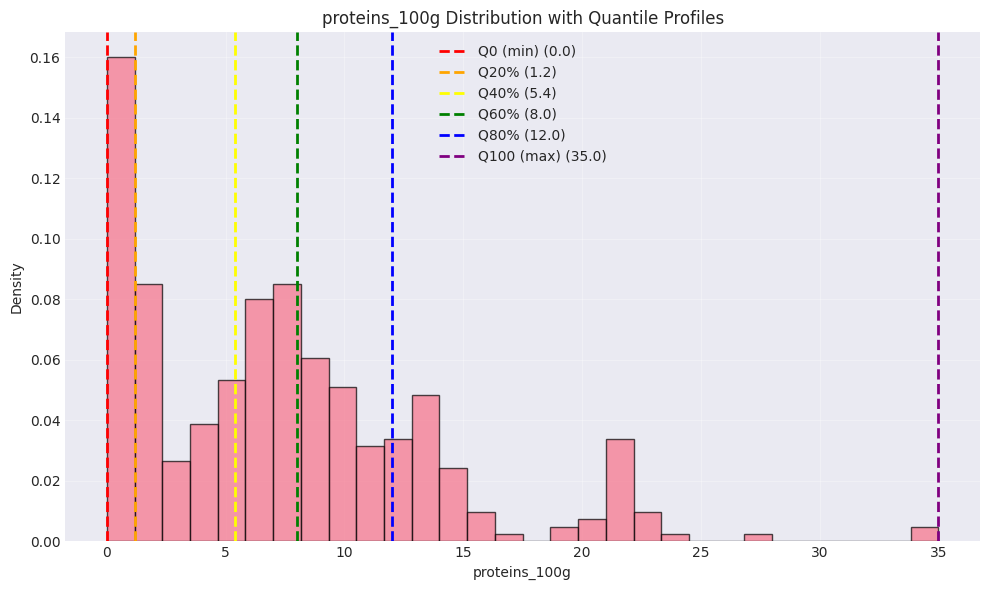



📊 FIBER_100G DISTRIBUTION
--------------------------------------------------
Q0 (min):     0.00
    Q20%:     0.00
    Q40%:     0.60
    Q60%:     2.00
    Q80%:     4.96
Q100 (max):    17.10



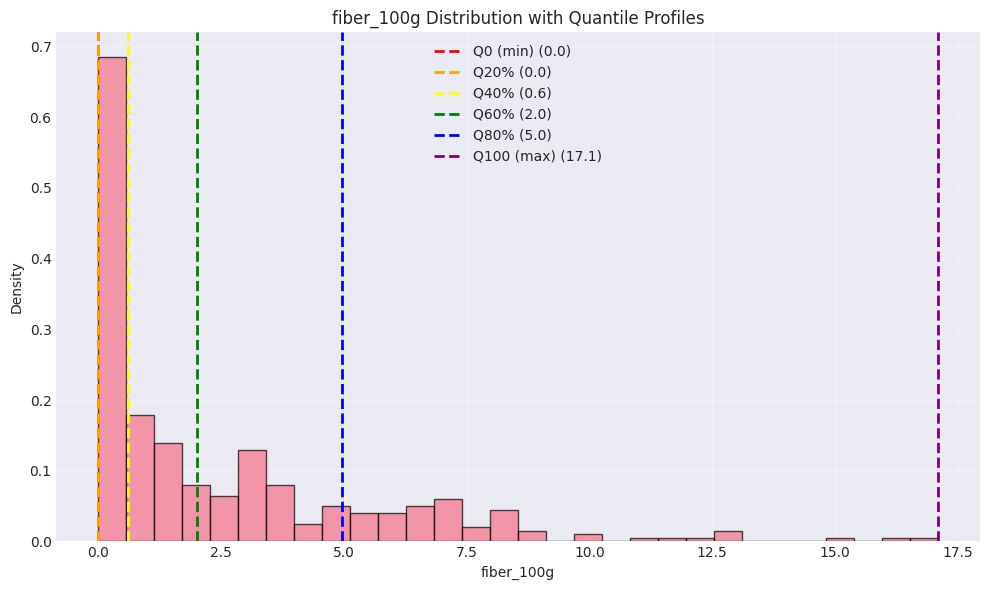



📊 FVL_PERCENT DISTRIBUTION
--------------------------------------------------
Q0 (min):     0.00
    Q20%:     0.00
    Q40%:     0.00
    Q60%:     2.50
    Q80%:    34.77
Q100 (max):   100.00



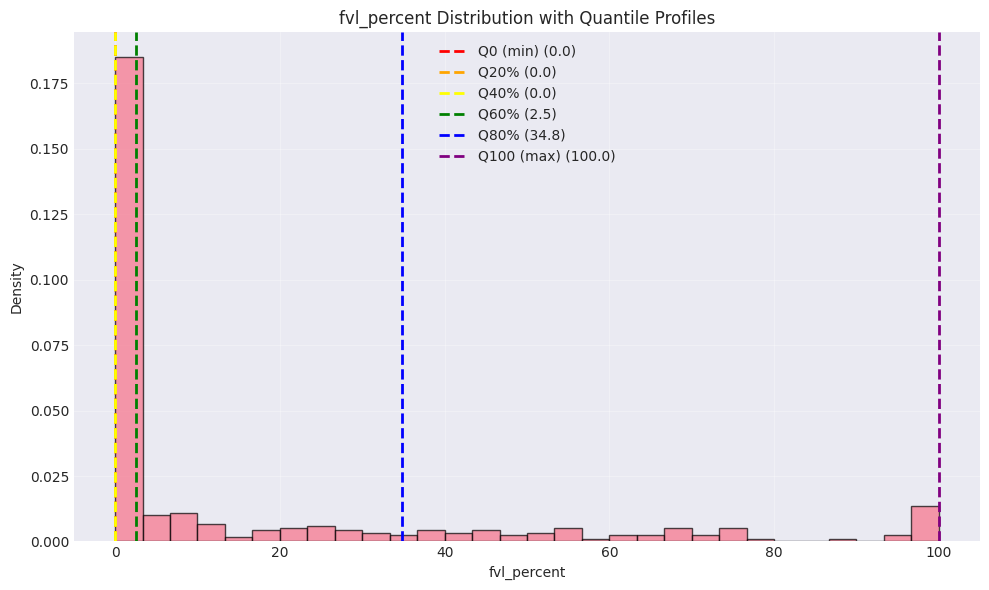



📊 GREEN_SCORE_VALUE DISTRIBUTION
--------------------------------------------------
Q0 (min):    15.00
    Q20%:    36.00
    Q40%:    54.00
    Q60%:    70.00
    Q80%:    78.00
Q100 (max):    89.00



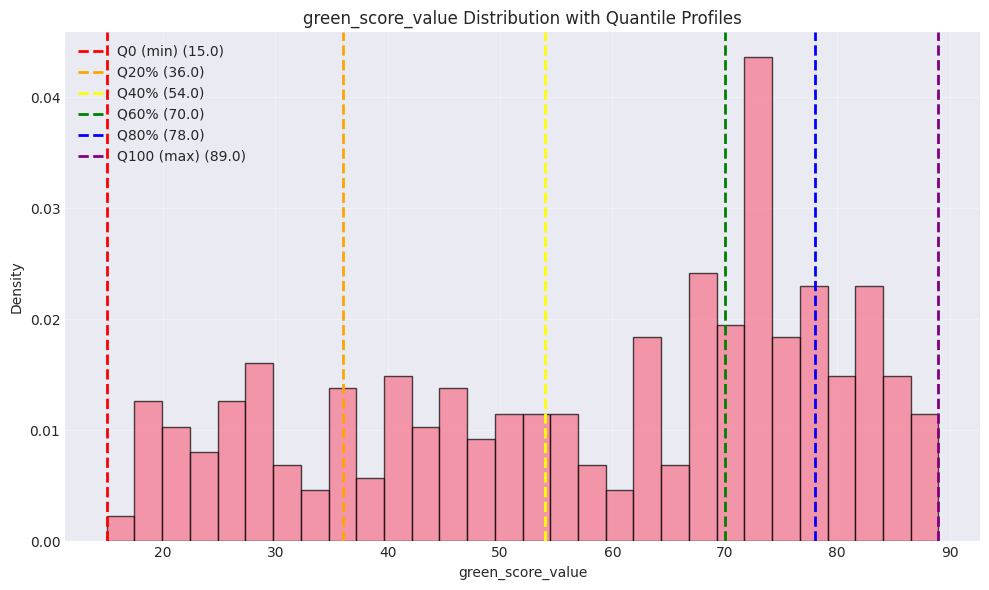

In [18]:
print("\n" + "="*80)
print("CRITERION DISTRIBUTIONS WITH QUANTILE LINES")
print("="*80)

quantiles = [0.0, 0.20, 0.40, 0.60, 0.80, 1.0]
quantile_profiles = df[criteria_cols + ['green_score_value']].quantile(quantiles)
profile_names = ['Q0 (min)', 'Q20%', 'Q40%', 'Q60%', 'Q80%', 'Q100 (max)']

# Colors for quantiles
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

for i, criterion in enumerate(criteria_cols + ['green_score_value']):
    print(f"\n📊 {criterion.upper()} DISTRIBUTION")
    print("-" * 50)
    
    # Print quantile values for this criterion
    q_vals = quantile_profiles[criterion].values
    for j, q_name in enumerate(profile_names):
        print(f"{q_name:>8}: {q_vals[j]:>8.2f}")
    
    print()
    
    # Create histogram with quantile lines
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(df[criterion].dropna(), bins=30, alpha=0.7, edgecolor='black', density=True)
    
    # Add vertical quantile lines
    for j, q_val in enumerate(q_vals):
        plt.axvline(x=q_val, color=colors[j], linestyle='--', linewidth=2, 
                   label=f'{profile_names[j]} ({q_val:.1f})')
    
    plt.xlabel(criterion)
    plt.ylabel('Density')
    plt.title(f'{criterion} Distribution with Quantile Profiles')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    print()

In [19]:
# ==============================================================================
# 9. PROPOSED LIMITING PROFILES
# ==============================================================================

print("\n" + "="*80)
print("PROPOSED LIMITING PROFILES FOR ELECTRE TRI")
print("="*80)

# Based on quantile analysis and domain knowledge
profiles = pd.DataFrame({
    'energy_100g': [800, 980, 1100, 1250, 1500, 2000],
    'saturated_fat_100g': [0.2, 0.6, 1.0, 1.5, 2.5, 10],
    'sugars_100g': [2.0, 3.5, 4.0, 5.0, 8.0, 35],
    'salt_100g': [0.5, 0.9, 1.0, 1.2, 1.8, 4.0],
    'proteins_100g': [5, 8, 9, 10, 12, 20],
    'fiber_100g': [1.0, 5.0, 5.5, 6.0, 7.0, 18],
    'green_score_value': [40, 60, 65, 70, 80, 100]
}, index=['π1 (Lower)', 'π2 (D\'/E\')', 'π3 (C\'/D\')', 'π4 (B\'/C\')', 'π5 (A\'/B\')', 'π6 (Upper)'])

print("\nProposed Limiting Profiles:")
print(profiles)


PROPOSED LIMITING PROFILES FOR ELECTRE TRI

Proposed Limiting Profiles:
            energy_100g  saturated_fat_100g  sugars_100g  salt_100g  \
π1 (Lower)          800                 0.2          2.0        0.5   
π2 (D'/E')          980                 0.6          3.5        0.9   
π3 (C'/D')         1100                 1.0          4.0        1.0   
π4 (B'/C')         1250                 1.5          5.0        1.2   
π5 (A'/B')         1500                 2.5          8.0        1.8   
π6 (Upper)         2000                10.0         35.0        4.0   

            proteins_100g  fiber_100g  green_score_value  
π1 (Lower)              5         1.0                 40  
π2 (D'/E')              8         5.0                 60  
π3 (C'/D')              9         5.5                 65  
π4 (B'/C')             10         6.0                 70  
π5 (A'/B')             12         7.0                 80  
π6 (Upper)             20        18.0                100  



RECOMMENDED WEIGHTS FOR CRITERIA

Three Weight Options:
                   Balanced  Health-Focused  Eco-Conscious
Energy (min)           0.20            0.25           0.18
Sat Fat (min)          0.15            0.15           0.13
Sugars (min)           0.15            0.15           0.13
Salt (min)             0.10            0.10           0.08
Proteins (max)         0.15            0.15           0.13
Fiber (max)            0.20            0.15           0.18
Green Score (max)      0.05            0.05           0.17

Sum of weights (should be 1.0):
Balanced          1.0
Health-Focused    1.0
Eco-Conscious     1.0
dtype: float64


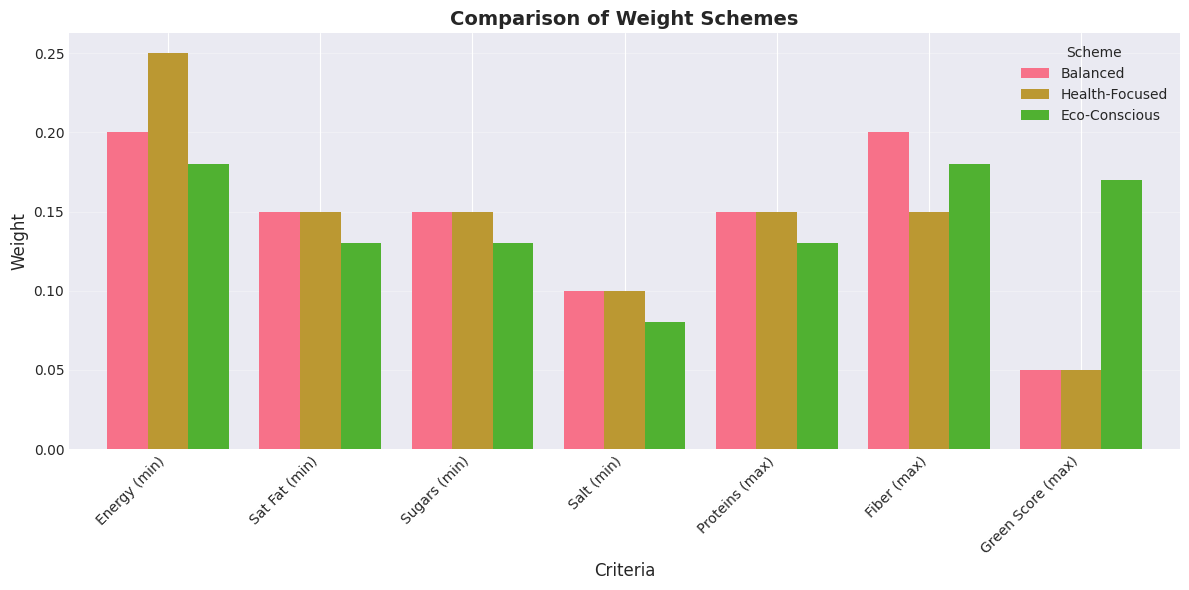

In [20]:
# ==============================================================================
# 10. RECOMMENDED WEIGHTS
# ==============================================================================

print("\n" + "="*80)
print("RECOMMENDED WEIGHTS FOR CRITERIA")
print("="*80)

weights_options = pd.DataFrame({
    'Balanced': [0.20, 0.15, 0.15, 0.10, 0.15, 0.20, 0.05],
    'Health-Focused': [0.25, 0.15, 0.15, 0.10, 0.15, 0.15, 0.05],
    'Eco-Conscious': [0.18, 0.13, 0.13, 0.08, 0.13, 0.18, 0.17]
}, index=['Energy (min)', 'Sat Fat (min)', 'Sugars (min)', 'Salt (min)', 
          'Proteins (max)', 'Fiber (max)', 'Green Score (max)'])

print("\nThree Weight Options:")
print(weights_options)
print(f"\nSum of weights (should be 1.0):")
print(weights_options.sum())

# Visualize weights
weights_options.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Comparison of Weight Schemes', fontsize=14, fontweight='bold')
plt.xlabel('Criteria', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Scheme')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [21]:
# ==============================================================================
# 11. KEY INSIGHTS SUMMARY
# ==============================================================================

print("\n" + "="*80)
print("KEY INSIGHTS SUMMARY")
print("="*80)

print("\n📊 DISTRIBUTION INSIGHTS:")
print(f"  • Energy: Range [{df['energy_100g'].min():.0f}, {df['energy_100g'].max():.0f}] kJ, CV = {(df['energy_100g'].std()/df['energy_100g'].mean()*100):.1f}%")
print(f"  • Fiber: Range [{df['fiber_100g'].min():.1f}, {df['fiber_100g'].max():.1f}] g - EXCELLENT discriminator")
print(f"  • FVL%: Mostly zero ({(df['fvl_percent']==0).sum()}/{len(df)} products) - Limited usefulness")
print(f"  • Proteins: Range [{df['proteins_100g'].min():.1f}, {df['proteins_100g'].max():.1f}] g")

print("\n🔗 CORRELATION INSIGHTS:")
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.5 and corr_matrix.columns[i] != corr_matrix.columns[j]:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr:
    for col1, col2, corr_val in high_corr[:5]:  # Show top 5
        print(f"  • {col1} ↔ {col2}: r = {corr_val:.3f}")
else:
    print("  • No very strong correlations (|r| > 0.5) found")

print("\n📋 LABEL DISTRIBUTION:")
print(f"  • Nutri-Score: Dominated by grades {nutri_dist.index[0]}-{nutri_dist.index[1]} ({nutri_dist.iloc[0]+nutri_dist.iloc[1]}/{len(df)} products)")
print(f"  • Green-Score: Most products in grade {green_dist.index[green_dist.argmax()]} ({green_dist.max()} products)")


KEY INSIGHTS SUMMARY

📊 DISTRIBUTION INSIGHTS:
  • Energy: Range [86, 3033] kJ, CV = 61.6%
  • Fiber: Range [0.0, 17.1] g - EXCELLENT discriminator
  • FVL%: Mostly zero (154/353 products) - Limited usefulness
  • Proteins: Range [0.0, 35.0] g

🔗 CORRELATION INSIGHTS:
  • energy_100g ↔ saturated_fat_100g: r = 0.555
  • energy_100g ↔ nutri_score_value: r = 0.577
  • sugars_100g ↔ nutri_score_value: r = 0.578

📋 LABEL DISTRIBUTION:
  • Nutri-Score: Dominated by grades A-B (141/353 products)
  • Green-Score: Most products in grade B (102 products)


In [23]:
# =============================================================================
# CONFIGURATION
# =============================================================================
# Define your criteria columns and directions
criteria_names = [
    'energy_100g', 'saturated_fat_100g', 'sugars_100g', 'salt_100g', 
    'proteins_100g', 'fiber_100g', 'fvl_percent', 'green_score_value'
]
# -1 = Minimize (Low is better for Grade A), 1 = Maximize (High is better for Grade A)
directions = [-1, -1, -1, -1, 1, 1, 1, 1] 

# Map labels to numeric values (0=E, 4=A)
grade_map = {'E': 0, 'D': 1, 'C': 2, 'B': 3, 'A': 4}

# =============================================================================
# 1. ANALYZE DISTRIBUTION
# =============================================================================

# Ensure we have the target column formatted correctly
if 'nutri_score_label' not in df.columns:
    raise ValueError("DataFrame missing 'nutri_score_label' column")

y = df['nutri_score_label'].astype(str).str.upper().str.strip().map(grade_map).fillna(0).astype(int).values
X = df[criteria_names].apply(pd.to_numeric, errors='coerce').fillna(0).values

# Calculate Counts and Percentages
total_samples = len(y)
inv_map = {0:'E', 1:'D', 2:'C', 3:'B', 4:'A'}

print("\n" + "="*60)
print("1. DATA DISTRIBUTION (CLASS SIZES)")
print("="*60)
print(f"{'Class':<6} | {'Count':<8} | {'Percentage':<12} | {'Cumulative % (Boundary)':<25}")
print("-" * 60)

current_cumulative = 0
cumulative_pcts = []

# Iterate from E (0) to B (3) to find the "Top" boundary of each class
# We don't need A's boundary because A is everything above B.
for k in range(4): # 0, 1, 2, 3
    count = np.sum(y == k)
    pct = (count / total_samples) * 100
    current_cumulative += pct
    
    # Store for threshold calculation
    # Clamp to avoid 0/100 issues
    safe_cumulative = np.clip(current_cumulative, 1, 99)
    cumulative_pcts.append(safe_cumulative)
    
    print(f"{inv_map[k]:<6} | {count:<8} | {pct:>9.2f}%  | {current_cumulative:>21.2f}%")

# Print Class A separately (it has no upper boundary in this logic)
count_a = np.sum(y == 4)
pct_a = (count_a / total_samples) * 100
print(f"{'A':<6} | {count_a:<8} | {pct_a:>9.2f}%  | {'(Top Class)':>21}")
print("-" * 60)
print(f"TOTAL  | {total_samples:<8} | 100.00%")


# =============================================================================
# 2. CALCULATE AND PRINT THRESHOLDS
# =============================================================================

print("\n" + "="*60)
print("2. CALCULATED LIMITING PROFILES (THRESHOLDS)")
print("="*60)
print("These are the specific values separating the classes based on the data.\n")

# Create a DataFrame to hold the thresholds
boundary_names = ["D/E (Limit 1)", "C/D (Limit 2)", "B/C (Limit 3)", "A/B (Limit 4)"]
threshold_df = pd.DataFrame(index=boundary_names, columns=criteria_names)

for i, col in enumerate(criteria_names):
    direction = directions[i]
    
    for k in range(4): # Boundaries for E|D, D|C, C|B, B|A
        percentile = cumulative_pcts[k]
        
        if direction == -1:
            # MINIMIZE (Energy, Sugar): 
            # Class E (Worst) is at the TOP (High values).
            # Class A (Best) is at the BOTTOM (Low values).
            # So the boundary "above" E is actually at the (100 - p) percentile.
            val = np.percentile(X[:, i], 100 - percentile)
        else:
            # MAXIMIZE (Protein, Fiber):
            # Class E (Worst) is at the BOTTOM (Low values).
            # The boundary "above" E is at the p percentile.
            val = np.percentile(X[:, i], percentile)
            
        threshold_df.iloc[k, i] = val

# Formatting for cleaner output
# Transpose so Criteria are rows and Boundaries are columns (usually easier to read)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

formatted_df = threshold_df.T
print(formatted_df)

print("\nInterpretation:")
print("- A value 'better' than the A/B Limit puts the item in Class A.")
print("- A value 'worse' than the D/E Limit puts the item in Class E.")


1. DATA DISTRIBUTION (CLASS SIZES)
Class  | Count    | Percentage   | Cumulative % (Boundary)  
------------------------------------------------------------
E      | 69       |     19.55%  |                 19.55%
D      | 59       |     16.71%  |                 36.26%
C      | 84       |     23.80%  |                 60.06%
B      | 70       |     19.83%  |                 79.89%
A      | 71       |     20.11%  |           (Top Class)
------------------------------------------------------------
TOTAL  | 353      | 100.00%

2. CALCULATED LIMITING PROFILES (THRESHOLDS)
These are the specific values separating the classes based on the data.

                   D/E (Limit 1) C/D (Limit 2) B/C (Limit 3) A/B (Limit 4)
energy_100g          1648.195467   1392.362606    788.209632    430.195467
saturated_fat_100g           3.0           1.5           0.5           0.1
sugars_100g            26.839093      4.936261      2.568045           0.9
salt_100g                    1.2           0.8    